In [117]:
from nilearn import (plotting, image, masking, maskers)
from nilearn.datasets import (load_mni152_template)
import os
import numpy as np
from os.path import join
import matplotlib.pyplot as plt

In [2]:
def fisher_mean(correlation, axis=None):
    return np.tanh(np.nanmean(np.arctanh(correlation), axis=axis))

In [118]:
# 3mm template
template = load_mni152_template(resolution=3)


In [119]:
high_cue = '/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/deriv07_isc/sub-avg_ses-avg_run-avg_event-stimulus_cuetype-high.nii.gz'
low_cue = '/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/deriv07_isc/sub-avg_ses-avg_run-avg_event-stimulus_cuetype-low.nii.gz'

In [137]:
ref_img = image.load_img(high_cue)
# canlab_dir = '/dartfs-hpc/rc/lab/C/CANlab/modules/CanlabCore'
canlab_dir = '/Users/h/Documents/MATLAB/CanlabCore'
mask = image.load_img(join(canlab_dir, 'CanlabCore/canlab_canonical_brains/Canonical_brains_surfaces/brainmask_canlab.nii'))

mask_img = image.resample_to_img(masking.compute_epi_mask(mask), template) #, target_affine=ref_img.affine, target_shape=ref_img.shape)
print(f"* mask shape after resampling to MNI 3mm: {mask_img.shape}")
# mask_affine = ref_img.affine
# mask_affine[:3, :3] = np.diag([3] * 3)
# x, y, z = ref_img.shape
original_voxel_size = ref_img.header.get_zooms()
# target_voxel_size = (3, 3, 3)
# # target_affine = np.diag(target_voxel_size + (1,))
# target_shape = tuple(int(dim / voxel_size) for dim, voxel_size in zip((mask_img.shape), original_voxel_size))
nifti_masker = maskers.NiftiMasker(mask_img=mask_img) #, target_affine=template.affine, target_shape=target_shape) #, target_affine=mask_affine, target_shape=target_shape, memory_level=1)

mask shape after resampling to MNI 3mm: (67, 79, 64)


/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/image/resampling.py:294: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(


In [138]:
nifti_masker

NiftiMasker(mask_img=<nibabel.nifti1.Nifti1Image object at 0x28ae6c950>)

In [141]:
array = nifti_masker.fit_transform(high_cue)
print(f"array shape: {array.shape}")

/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:98: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


    * fisher z transformed average value: 0.16031165421009064


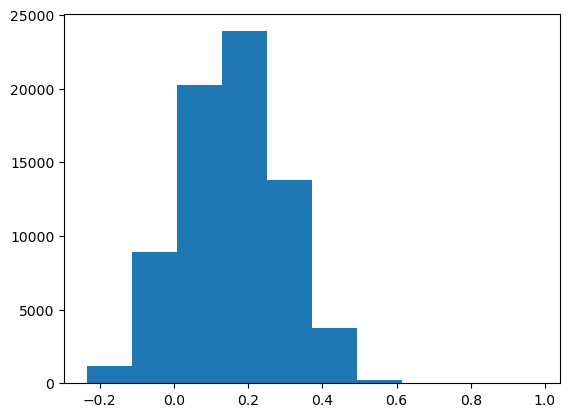

In [145]:
plt.hist(array[0])
print(f"    * fisher z transformed average value: {fisher_mean(array)}")

In [146]:
masked_fisher = nifti_masker.inverse_transform(array)
print(f"    * double check masked_fisher shape: {masked_fisher.shape}")

    * double check masked_fisher shape: (67, 79, 64, 1)


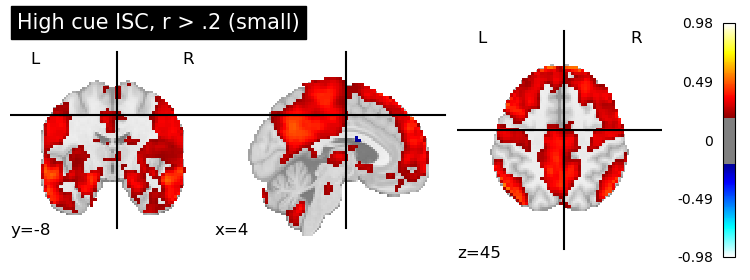

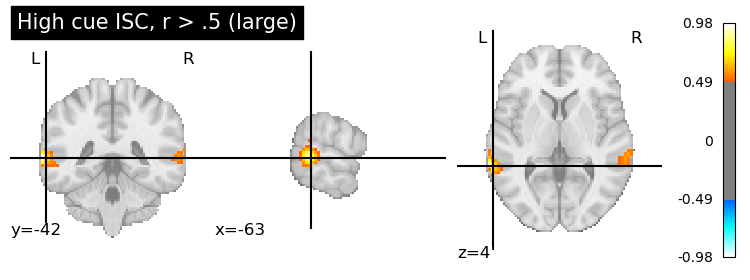

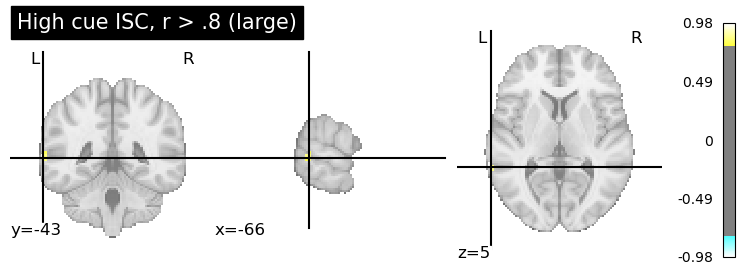

In [147]:
plotting.plot_stat_map(masked_fisher, threshold=.2, title=f"High cue ISC, r > .2 (small)")
plotting.plot_stat_map(masked_fisher, threshold=.5, title=f"High cue ISC, r > .5 (large)")
plotting.plot_stat_map(masked_fisher, threshold=.8, title=f"High cue ISC, r > .8 (large)")


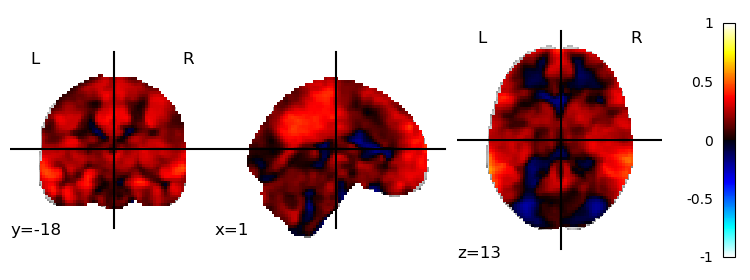

In [148]:
plotting.plot_stat_map(high_cue)